## Основное функциональное уравнение динамического программирования (ДП):    
$W_{i} (k_{i}) = max_{x_{i}<=k_{i}} \{ (lnx + 10) + (6+lnx+8) + W_{i+1} (0.65x+0.87(k-x)) \}$

## На i-ом этапе количество средств: 
$k_{i} = 0.87x_{i-1} + 0.65x_{i-1}$

## Графики зависимости  условно максимальной производительности и условно оптимального управления от k

3 месяц
k_3: [ 75.205       81.81868889  88.43237778  95.04606667 101.65975556
 108.27344444 114.88713333 121.50082222 128.11451111 134.7282    ]
x_3: [ 76.  82.  89.  96. 102. 109. 115. 122. 129. 135.]


<ipython-input-3-002c822d7af7>:9: RuntimeWarning: divide by zero encountered in log
  return 6+np.log(x)+8
<ipython-input-3-002c822d7af7>:13: RuntimeWarning: invalid value encountered in log
  return np.log(x)+10


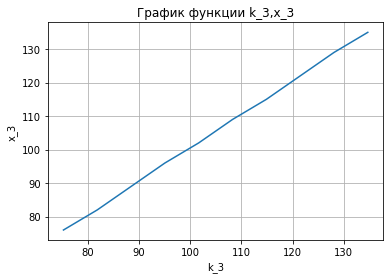

<ipython-input-3-002c822d7af7>:9: RuntimeWarning: divide by zero encountered in log
  return 6+np.log(x)+8


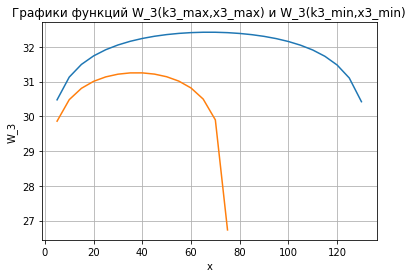

<ipython-input-3-002c822d7af7>:9: RuntimeWarning: divide by zero encountered in log
  return 6+np.log(x)+8
<ipython-input-3-002c822d7af7>:13: RuntimeWarning: invalid value encountered in log
  return np.log(x)+10


W_3: [31.25006757 31.36696002 31.48385248 31.60074493 31.71763738 31.83452983
 31.95142229 32.06831474 32.18520719 32.30209964 32.4189921 ]
2 месяц
k_2: [115.7        120.05111111 124.40222222 128.75333333 133.10444444
 137.45555556 141.80666667 146.15777778 150.50888889 154.86      ]
x_2: [116. 121. 125. 129. 134. 138. 142. 147. 151. 155.]


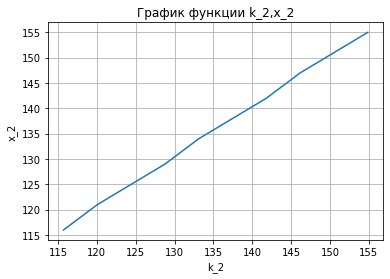

<ipython-input-3-002c822d7af7>:9: RuntimeWarning: divide by zero encountered in log
  return 6+np.log(x)+8


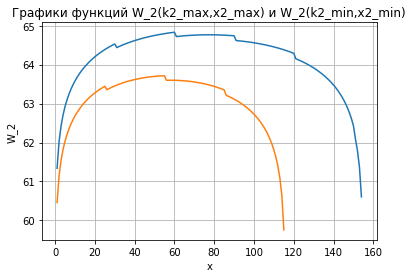

W_2: [63.71402181 63.82581502 63.93760823 64.04940143 64.16119464 64.27298784
 64.38478105 64.49657426 64.60836746 64.72016067 64.83195387]


<ipython-input-3-002c822d7af7>:9: RuntimeWarning: divide by zero encountered in log
  return 6+np.log(x)+8
<ipython-input-3-002c822d7af7>:13: RuntimeWarning: divide by zero encountered in log
  return np.log(x)+10


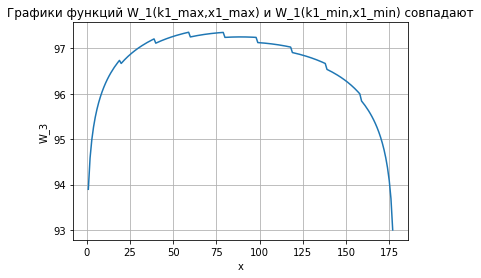

Total Win W1=  97.35323519311873
k_1: [178. 178. 178. 178. 178. 178. 178. 178. 178. 178.]
x_1: [59. 59. 59. 59. 59. 59. 59. 59. 59. 59.  0.]


In [3]:
#-*-coding: utf-8-*-
import matplotlib.pyplot as plt
import numpy as np

iteration = 0
start_k = 178
# Призводительность цеха 1
def f1(x):
    return 6+np.log(x)+8

# Призводительность цеха 2
def f2(x):
    return np.log(x)+10 

# Общая производительность за месяц
def w(k, x):
    return (f1(x)+f2(k-x))

# Остаток производства за месяц
def phi(k,x):
    return (0.65 *x + 0.87*(k-x))

# Вычисление условного оптимального выигрыша при заданном остатке k
def  W(k,ks,Ws):
    xs =  np.arange(k+1)
    next_k = phi(k,xs)
    vals = w(k,xs) + Ws[np.searchsorted(ks,next_k)]
    besti = np.argmax(vals)
    return (vals[besti],xs[besti])

# Вычисление условного оптимального выигрыша при заданном остатке k и заданных
# управлениях xs.
def Wx(k, xs, ks, Ws):
    next_k = phi(k, xs)
    return w(k,xs) + Ws[np.searchsorted(ks, next_k)]

#Для  3-го месяца
print("3 месяц")
k_4 = np.linspace(0.65**3*178,0.87**3*178,10)
W_4 = np.zeros(len(k_4)+1)
k3_min = 0.65**2*178
k3_max = 0.87**2*178
k_3 = np.linspace(k3_min,k3_max,10)
#W_3 = np.zeros(len(k_4)+1)
W_3 = np.zeros(len(k_4))
x_3 = W_3
for i in range(len(k_3)):
    (W_3[i],x_3[i]) = W(k_3[i],k_4,W_4)

print("k_3:",k_3)
print("x_3:",x_3)
plt.plot(k_3,x_3)
plt.xlabel('k_3')
plt.ylabel('x_3')
plt.grid(True)
plt.title('График функции k_3,x_3')
plt.show()
    
x3_min = np.arange(0,k3_min,5)
x3_max = np.arange(0,k3_max,5)
W_3 = np.linspace(np.max(w(k3_min,x3_min)),np.max(w(k3_max,x3_max)),11)
plt.plot(x3_max,w(k3_max,x3_max),x3_min,w(k3_min,x3_min))
plt.xlabel('x')
plt.ylabel('W_3')
plt.grid(True)
plt.title('Графики функций W_3(k3_max,x3_max) и W_3(k3_min,x3_min)')
plt.show()

print("W_3:",W_3)

#Для  2-го месяца
print("2 месяц")
k2_min = 0.65**1*178
k2_max = 0.87**1*178
k_2 = np.linspace(k2_min,k2_max,10)
#W_2 = np.zeros(len(k_2)+1)
W_2 = np.zeros(len(k_2))
x_2 = W_2
for i in range(len(k_2)):
    (W_2[i],x_2[i]) = W(k_2[i],k_3,W_3)

print("k_2:",k_2)
print("x_2:",x_2)
plt.plot(k_2,x_2)
plt.xlabel('k_2')
plt.ylabel('x_2')
plt.grid(True)
plt.title('График функции k_2,x_2')
plt.show()
    
x2_min = np.arange(k2_min)
x2_max = np.arange(k2_max)
w2_max = Wx(k2_max, x2_max, k_3, W_3);
w2_min = Wx(k2_min, x2_min, k_3, W_3);
W_2 = np.linspace(np.max(w2_min),np.max(w2_max),11)
plt.plot (x2_max,w2_max,x2_min,w2_min);
plt.xlabel('x')
plt.ylabel('W_2')
plt.grid(True)
plt.title('Графики функций W_2(k2_max,x2_max) и W_2(k2_min,x2_min)')
plt.show()

print("W_2:",W_2)

#Для  1-го месяца
k1_max = 178
x1_max = np.arange(k1_max)
k_1 = np.linspace(0.65**0*178,0.87**0*178,10)
W_1 = np.zeros(len(k_1)+1)
x_1 = W_1
for i in range(len(k_1)):
     (W_1[i],x_1[i]) = W(k_1[i],k_2,W_2)
w1_max = Wx(k1_max,x1_max,k_2,W_2)
W_1 = np.max(w1_max)

plt.plot(x1_max,w1_max)
plt.xlabel('x')
plt.ylabel('W_3')
plt.grid(True)
plt.title('Графики функций W_1(k1_max,x1_max) и W_1(k1_min,x1_min) совпадают')
plt.show()

print("Total Win W1= ",W_1)
print("k_1:",k_1)
print("x_1:",x_1)


## Прямая прогонка решения задачи 
Определим на единственной кривой графика $W_{1}(k_{1}, x_{1})$ максимум и находим оптимальное управление на первом шаге $x_{1}=59$, показывающее, сколько средств надо вкладывать в первый цех, и соответствующую максимальную производительность за месяц $W_{1} = 97$. 
Количество средств вкладываемые во второй цех:    
${x_{1(2)}} = k_{1}-x_{1}=178-59=119$    
Находим соответствующий запас средств к концу первого шага:  
$k_{2}=x_{1}*0.87+x_{1(2)} *0.65=128.68 ≈129$  
Найдем оптимальное управление на втором шаге, показывающее сколько средств нужно вкладывать в первый цех:
$x_{2} ≈ 129;$  
А также количество средств вкладываемых во второй цех:  
$x_{2(2)} =k_{2}-x_{2}=129-129=0$   
Остаток средств к концу второго шага будет  
$k_{3}=x_{2}*0.87+x_{2(2)} *0.65≈112$  
Найдем оптимальное управление на третьем шаге, показывающее сколько средств нужно вкладывать в первый цех: $x_{3} = 112$  
А также количество средств вкладываемых во второй цех:  
$x_{3(2)} =k_{3}-x_{3}=112-112=0$  
Остаток средств к концу третьего шага будет  
$x_{3}*0.87+x_{3(2)} *0.65=97.44$ 



Таким образом, можно сформулировать следующие рекомендации по оптимальному распределению средств. Из имеющегося в начале квартала запаса средств k=178 усл. ед. и остающихся средств в конце каждого месяца нужно вкладывать по месяцам в цеха I и II следующие суммы:  
Оптимальный план будет иметь вид:  

| Месяц                               | 1   | 2   | 3   |
|-------------------------------------|-----|-----|-----|
| Средства, выделяемые на первом цехе | 59  | 129 | 112 |
| Средства, выделяемые на втором цехе | 119 |  0  |  0  | 

При таком планировании будет получена максимальная производительность за месяц, равная 97 усл. ед.  
Определим остаток средств на конец квартала: 112* 0.87 + 0 * 0.65 = 97 усл. ед.